<h1 align="center" style="margin-bottom: 20px;">Machine Learning 2024-25</h1>
<h3 align="center" style="margin-top: 20px; margin-bottom: 20px;">To Grant or Not to Grant: Deciding on Compensation Benefits</h3>
<h5 align="center" style="margin-top: 20px; margin-bottom: 0px;">Cross-Validation for Best Default Models with Optimized Parameters</h5>

### Group 38 - Members:
- Ana Marta Azinheira  - 20240496@novaims.unl.pt
- Braulio Damba - 20240007@novaims.unl.pt
- Catarina Ribeirinha - 20240507@novaims.unl.pt
- Marco Galão  - r20201545@novaims.unl.pt
- Rodrigo Sardinha - 20211627@novaims.unl.pt

# Table of Contents

* [1. Imports](#imports)
  * [1.1. Import Libraries](#import_libraries)
  * [1.2. Imports Datasets](#import_datasets)

* [2. Cross-Validation for Best Default Models with Optimized Parameters](#cv_optimized_parameters)

# 1. Imports <a id="imports"></a>

## 1.1. Import the Libraries <a class="anchor" id="import_libraries"></a>


In [338]:
# Path Management
import sys
import os

# Get the current working directory (folder where the notebook is located)
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
# Get the absolute path to the project root (one level up from the notebook's directory)
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))
# Add the project root to sys.path
sys.path.append(project_root)
# Utils
from utils import *
# Visualization Settings
%config InlineBackend.figure_format = 'retina'
sns.set()

# Omit Warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import StackingClassifier

## 1.2. Import the Datasets <a class="anchor" id="import_datasets"></a>

In [341]:
# Define date columns to parse
date_cols = ["Accident Date", "Assembly Date", "C-2 Date", "C-3 Date", "First Hearing Date"]

In [343]:
df = pd.read_csv('./df_nb2.csv', sep=',', parse_dates=date_cols, index_col='Claim Identifier')
df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,C-2 Date,C-3 Date,Carrier Name,Carrier Type,...,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Male
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31,0.0,2020-01-01,0,0.00,2019-12-31,NaT,new hampshire insurance company,1A. PRIVATE,...,RETAIL TRADE,I,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662.0,1.0
5393091,2019-08-30,46,0.0,2020-01-01,1,1745.93,2020-01-01,2020-01-01,zurich american insurance company,1A. PRIVATE,...,CONSTRUCTION,I,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569.0,0.0
5393889,2019-12-06,40,0.0,2020-01-01,0,1434.80,2020-01-01,NaT,indemnity insurance company of,1A. PRIVATE,...,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589.0,1.0
5393887,2019-12-30,61,0.0,2020-01-01,0,NaN,2019-12-31,NaT,state insurance fund,2A. SIF,...,HEALTH CARE AND SOCIAL ASSISTANCE,II,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603.0,1.0
5393863,2019-12-26,67,0.0,2020-01-01,0,0.00,2019-12-31,NaT,indemnity insurance of n america,1A. PRIVATE,...,RETAIL TRADE,IV,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772.0,1.0


# 2. Cross-Validation for Best Default Models with Optimized Parameters <a id="cv_optimized_parameters"></a>

In [9]:
def results_plot(results):
    models = []
    accuracies = []
    new_list_models = []
    
   
    for model_name, values in results.items():
        models.append(model_name)
        avg_val = round(np.mean(values['f1_val_list']),3)
        accuracies.append(avg_val)
    
   
    dic_shortname = {
        "Adaboost": "ab",
        "Bagging": "bg",
        "DecisionTree": "dt",
        "GaussianNB": "nb",
        "LogisticRegression": "lr",
        "NeuralNetworks": "nn",
        "RandomForest": "rf",
        "XGBoost": "xg",
     
    }
    for name in models:
        new_list_models.append(dic_shortname.get(name, name))
    
   
    data_tuples = list(zip(new_list_models,accuracies))
    data = pd.DataFrame(data_tuples)
    data = data.sort_values(1)
    plt.bar(data[0], data[1])
    plt.xlabel('Models', fontsize=12, color='black')
    plt.ylabel('Mean Val F1 Score', fontsize=12, color='black')
    plt.title('Model Performance on Val', fontsize=14, color='black')
    plt.xticks(color='black')
    plt.yticks(color='black')
    plt.show()

In [68]:
# Load results from cross-validation for models with default parameters (notebook "CV_DefaultModels")
cv_dict_default_models = joblib.load('./cv_dict_default_models.pkl')
cv_df_default_models = joblib.load('./cv_df_default_models.pkl')

cv_df_default_models

,F1 Val,F1 Train,F1 Val-Train,Time (s),Iterations,Best Params
XGBoost,0.376 +/- 0.01,0.668 +/- 0.01,-0.292 +/- 0.01,14.215 +/- 0.30,0.0 +/- 0.0,None
NeuralNetworks,0.362 +/- 0.00,0.552 +/- 0.01,-0.191 +/- 0.00,110.674 +/- 11.10,199.8 +/- 0.4,None
RandomForest,0.353 +/- 0.01,0.918 +/- 0.02,-0.565 +/- 0.02,43.501 +/- 2.23,0.0 +/- 0.0,None
Bagging,0.343 +/- 0.01,0.908 +/- 0.02,-0.564 +/- 0.02,11.462 +/- 0.56,0.0 +/- 0.0,None
LogisticRegression,0.339 +/- 0.00,0.404 +/- 0.01,-0.065 +/- 0.01,4.304 +/- 0.19,100.0 +/- 0.0,None
DecisionTree,0.327 +/- 0.01,0.918 +/- 0.02,-0.591 +/- 0.02,2.444 +/- 0.43,0.0 +/- 0.0,None
GaussianNB,0.258 +/- 0.00,0.311 +/- 0.01,-0.053 +/- 0.01,0.546 +/- 0.18,0.0 +/- 0.0,None
Adaboost,0.216 +/- 0.03,0.340 +/- 0.04,-0.124 +/- 0.02,10.707 +/- 0.84,0.0 +/- 0.0,None


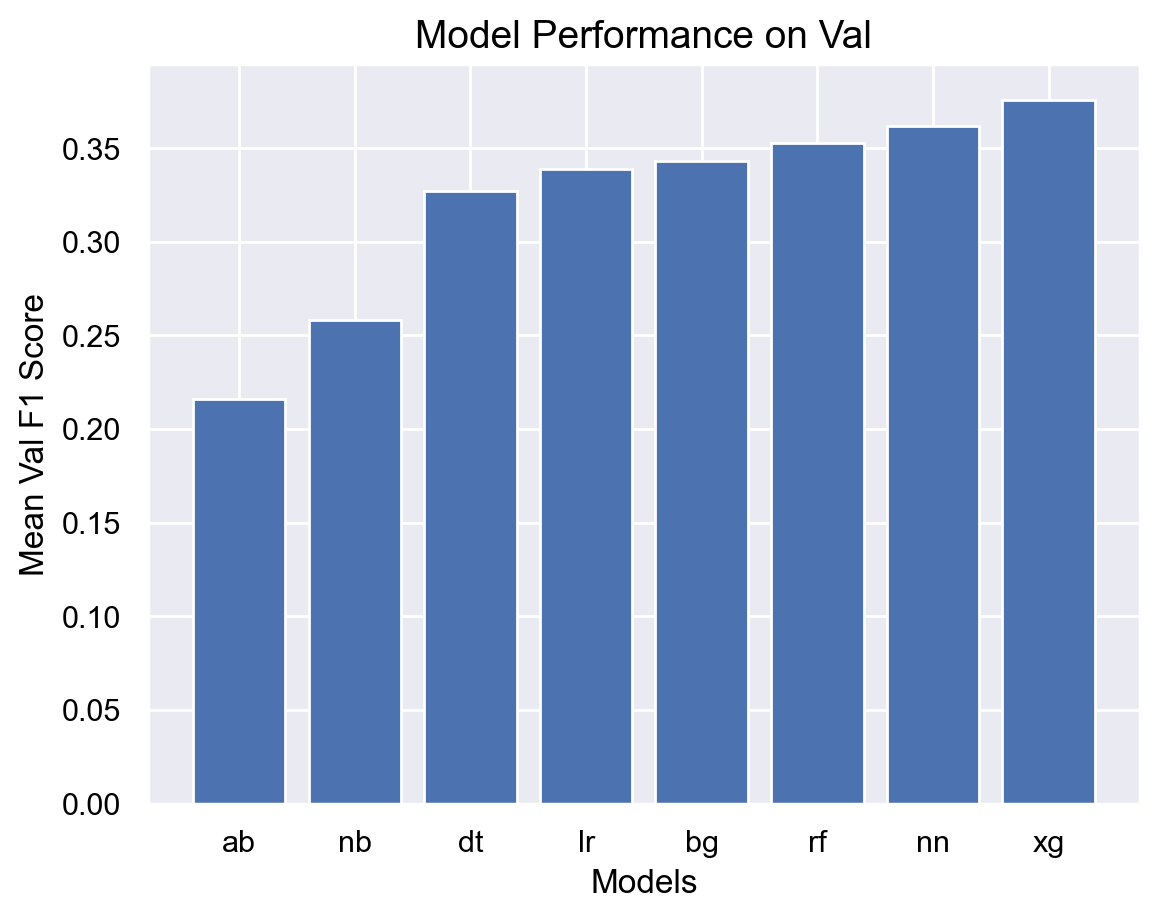

In [70]:
results_plot(cv_dict_default_models)

**Best Default Models:** XGBoost, Bagging, NeuralNetworks, RandomForest (GBM optional)

In [73]:
# Define hyperparameters for each model
models_optimized_parameters = {
    "Bagging": {
        "n_estimators": [10, 50, 100, 200],
        "max_samples": [0.5, 0.7, 1.0],
        "max_features": [0.5, 0.7, 1.0],
        'estimator': [
            DecisionTreeClassifier(
                max_depth=d,
                min_samples_split=split,
                min_samples_leaf=leaf,
                max_features=f,
                class_weight=cw 
            )
            for d in [3, 5, 10, None]
            for split in [2, 5, 10]
            for leaf in [1, 2, 5]
            for f in [None, 0.8, 'sqrt', 'log2']
            for cw in ["balanced", None]
        ]
    },
    # Some rule of thumbs (from class notebook):
    # -	The number of hidden neurons should be between the size of the input layer and the size of the output layer - 20 >= x >= 1
    # -	The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer - 15
    # -	The number of hidden neurons should be less than twice the size of the input layer - x <= 40
    "NeuralNetworks": {
        "hidden_layer_sizes": [(7, 7), (9, 9), (11, 11), (7, 7, 7), (9, 9, 9), (11, 11, 11)],
        "activation": ["relu"],
        "solver": ["adam"],
        "learning_rate": ["constant", "adaptive"],
        "learning_rate_init": [0.001, 0.01],
    },

    "RandomForest": {
        "n_estimators": [50, 100, 200, 300],
        "max_depth": [3, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "class_weight": ["balanced", None],
        "max_samples":[None,0.6,0.8],
        'min_samples_leaf': [1, 2, 5],
        'max_features': ['sqrt',0.8, 'log2', None],
    },

    "XGBoost": {
        "learning_rate": [0.01, 0.05, 0.1, 0.2],
        "n_estimators": [50, 100, 150, 200],
        "max_depth": [3, 5, 8],
        "min_split_loss": [0, 0.1, 0.3],
        "subsample": [0.7, 0.8, 0.9, 1.0],
    }
}

optimized_models = define_models(models_optimized_parameters)
results, results_df = show_results(optimized_models, df, feats_dict)
results_df

--------------------------------------------------------------------------------
CV Iteration 1
--------------------------------------------------------------------------------

Starting Feature Selection:

Spearman Correlation - Number of Excluded Features: 2 / 19
Spearman Correlation - Excluded Features: {'Average Weekly Wage Category', 'Average Weekly Wage'}
Spearman Correlation - Highly Correlated Pairs: [('Average Weekly Wage Category', 'Average Weekly Wage'), ('Age * Avg Weekly Wage', 'Average Weekly Wage'), ('Age * Avg Weekly Wage', 'Average Weekly Wage Category')]

RFE - Number of Selected Features: 17 / 23
RFE - Selected Features: ['Age at Injury', 'Alternative Dispute Resolution', 'Attorney/Representative', 'Average Weekly Wage', 'COVID-19 Indicator', 'District Name', 'Male', 'C-2 Date Missing', 'C-3 Date Missing', 'First Hearing Date Missing', 'Age Group at Injury', 'Average Weekly Wage Category', 'Age * Avg Weekly Wage', 'Average Weekly Wage by Medical Fee Region', 'Part of

,F1 Val,F1 Train,F1 Val-Train,Time (s),Iterations,Best Params
XGBoost,0.383 +/- 0.01,0.647 +/- 0.03,-0.264 +/- 0.03,383.349 +/- 5.36,0.0 +/- 0.0,"{'learning_rate': 0.1, 'max_depth': 8.0, 'min_..."
RandomForest,0.376 +/- 0.01,0.652 +/- 0.01,-0.277 +/- 0.01,498.668 +/- 22.50,0.0 +/- 0.0,"{'class_weight': None, 'max_depth': 15, 'max_f..."
Bagging,0.375 +/- 0.01,0.708 +/- 0.07,-0.333 +/- 0.07,299.699 +/- 12.78,0.0 +/- 0.0,{'estimator': DecisionTreeClassifier(min_sampl...
NeuralNetworks,0.357 +/- 0.00,0.470 +/- 0.01,-0.113 +/- 0.01,168.357 +/- 16.05,72.5 +/- 39.7,"{'activation': 'relu', 'hidden_layer_sizes': (..."


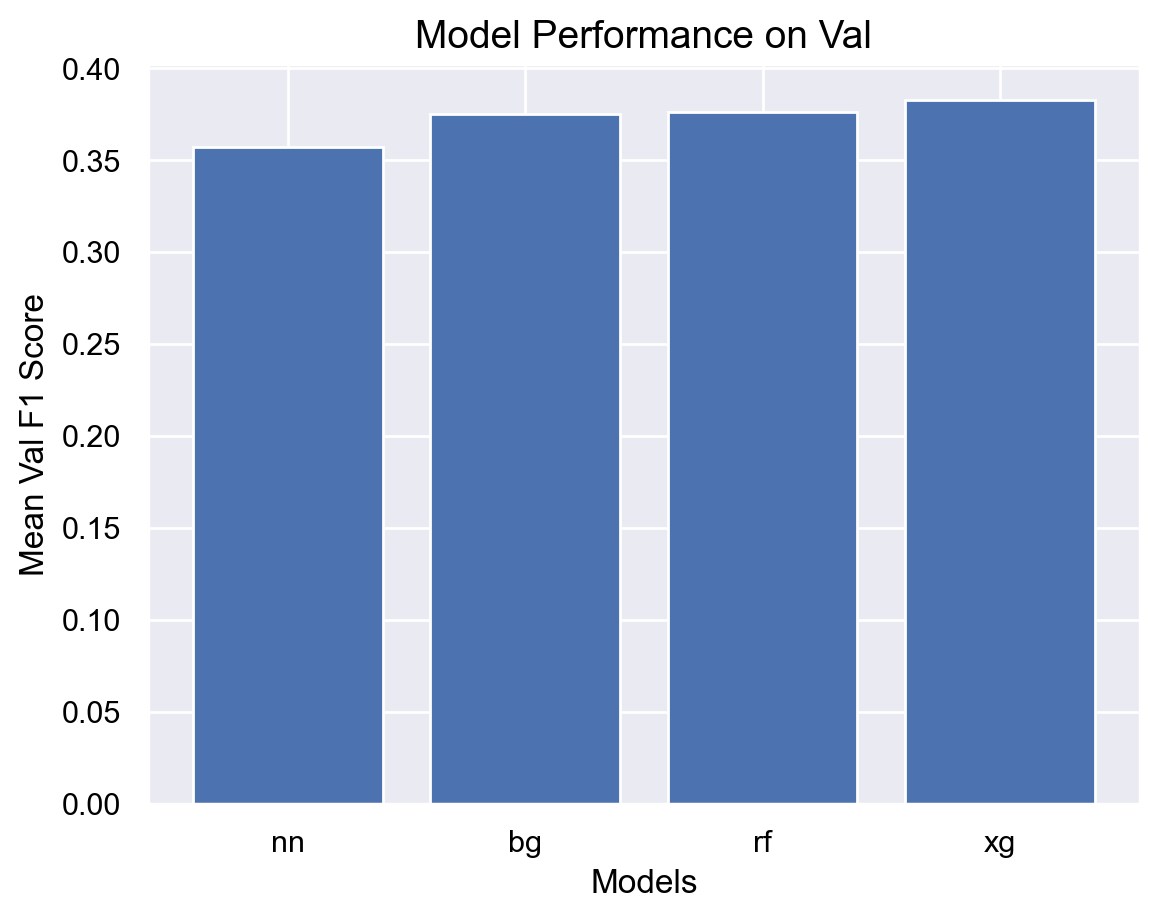

In [74]:
results_plot(results)

In [75]:
# # Save the returned dictionary
# joblib.dump(results, 'cv_dict_default_models.pkl')

# # Save the returned DataFrame
# joblib.dump(results_df, 'cv_df_default_models.pkl')

# Save the returned dictionary in the 'results' folder
joblib.dump(results, 'cv_dict_optimized_models4.pkl')

# Save the returned DataFrame in the 'results' folder
joblib.dump(results_df, 'cv_df_optimized_models4.pkl')

['cv_df_optimized_models4.pkl']

In [345]:
filepath='./cv_df_optimized_models4.pkl'  
results_df = joblib.load(filepath)

In [347]:
results_df['Best Params']['XGBoost']

{'learning_rate': 0.1,
 'max_depth': 8.0,
 'min_split_loss': 0.1,
 'n_estimators': 50.0,
 'subsample': 0.7}

In [349]:
def return_stacking_defined(estimators, final_estimator, results_df):
    def convert_to_int_if_float(param):
        if isinstance(param, float):
            return int(param)
        return param

    estimators_best_parameters = []
    for name, model in estimators:
        parameters = results_df.at[name, 'Best Params'] if name in results_df.index else None
        
        if parameters is not None:
            if 'max_depth' in parameters and parameters['max_depth'] is not None:
                parameters['max_depth'] = convert_to_int_if_float(parameters['max_depth'])
            if 'n_estimators' in parameters and parameters['n_estimators'] is not None:
                parameters['n_estimators'] = convert_to_int_if_float(parameters['n_estimators'])
        else:
            parameters = {}

        model_best_combination = model.set_params(**parameters)
        estimators_best_parameters.append((name, model_best_combination))
    
    st = StackingClassifier(estimators=estimators_best_parameters, final_estimator=final_estimator)
    return st


In [351]:
def setting_Stacking(models_parameters,estimators, final_estimator,results_df):
    models_and_parameters = {
        "Stacking": (return_stacking_defined(estimators,final_estimator,results_df), models_parameters["Stacking"])}
    return models_and_parameters

In [353]:
estimators = [('XGBoost', XGBClassifier(random_state=42)),
              ('RandomForest', RandomForestClassifier(random_state=42)),
               ('GaussianNB',GaussianNB())]
estimators1=[('XGBoost', XGBClassifier(random_state=42)),
              ('RandomForest', RandomForestClassifier(random_state=42)),
             ('NeuralNetworks',MLPClassifier(random_state = 42))]
estimators2=[('XGBoost', XGBClassifier(random_state=42)),
              ('LogisticRegression', LogisticRegression(random_state = 42)),
               ('GaussianNB',GaussianNB())]
estimators3=[('XGBoost', XGBClassifier(random_state=42)),
              ('NeuralNetworks',MLPClassifier(random_state = 42)),
               ('GaussianNB',GaussianNB())]
final_estimator=LogisticRegression(random_state=42)


In [355]:
stacking_default_parameters = {
    "Stacking": {}
}

In [117]:
#'XGBoost','RandomForest','NaiveBayes'
stacking_with_models=setting_Stacking(stacking_default_parameters,estimators, final_estimator,results_df)
results2, results_df2 = show_results(stacking_with_models, df, feats_dict)
results_df2

--------------------------------------------------------------------------------
CV Iteration 1
--------------------------------------------------------------------------------

Starting Feature Selection:

Spearman Correlation - Number of Excluded Features: 2 / 19
Spearman Correlation - Excluded Features: {'Average Weekly Wage Category', 'Average Weekly Wage'}
Spearman Correlation - Highly Correlated Pairs: [('Average Weekly Wage Category', 'Average Weekly Wage'), ('Age * Avg Weekly Wage', 'Average Weekly Wage'), ('Age * Avg Weekly Wage', 'Average Weekly Wage Category')]

RFE - Number of Selected Features: 17 / 23
RFE - Selected Features: ['Age at Injury', 'Alternative Dispute Resolution', 'Attorney/Representative', 'Average Weekly Wage', 'COVID-19 Indicator', 'District Name', 'Male', 'C-2 Date Missing', 'C-3 Date Missing', 'First Hearing Date Missing', 'Age Group at Injury', 'Average Weekly Wage Category', 'Age * Avg Weekly Wage', 'Average Weekly Wage by Medical Fee Region', 'Part of

,F1 Val,F1 Train,F1 Val-Train,Time (s),Iterations,Best Params
Stacking,0.385 +/- 0.01,0.663 +/- 0.01,-0.278 +/- 0.01,582.217 +/- 35.41,0.0 +/- 0.0,None


In [119]:
#'XGBoost','RandomForest','NeuralNetworks'
stacking_with_models=setting_Stacking(stacking_default_parameters,estimators1, final_estimator,results_df)
results3, results_df3 = show_results(stacking_with_models, df, feats_dict)
results_df3

--------------------------------------------------------------------------------
CV Iteration 1
--------------------------------------------------------------------------------

Starting Feature Selection:

Spearman Correlation - Number of Excluded Features: 2 / 19
Spearman Correlation - Excluded Features: {'Average Weekly Wage Category', 'Average Weekly Wage'}
Spearman Correlation - Highly Correlated Pairs: [('Average Weekly Wage Category', 'Average Weekly Wage'), ('Age * Avg Weekly Wage', 'Average Weekly Wage'), ('Age * Avg Weekly Wage', 'Average Weekly Wage Category')]

RFE - Number of Selected Features: 17 / 23
RFE - Selected Features: ['Age at Injury', 'Alternative Dispute Resolution', 'Attorney/Representative', 'Average Weekly Wage', 'COVID-19 Indicator', 'District Name', 'C-2 Date Missing', 'C-3 Date Missing', 'First Hearing Date Missing', 'Age Group at Injury', 'Average Weekly Wage Category', 'Age * Avg Weekly Wage', 'Average Weekly Wage by Medical Fee Region', 'Average Weekly 

,F1 Val,F1 Train,F1 Val-Train,Time (s),Iterations,Best Params
Stacking,0.385 +/- 0.01,0.656 +/- 0.01,-0.272 +/- 0.01,710.613 +/- 33.51,0.0 +/- 0.0,None


In [120]:
#'XGBoost','LogisticRegression','NaiveBayes'
stacking_with_models=setting_Stacking(stacking_default_parameters,estimators2, final_estimator,results_df)
results4, results_df4 = show_results(stacking_with_models, df, feats_dict)
results_df4

--------------------------------------------------------------------------------
CV Iteration 1
--------------------------------------------------------------------------------

Starting Feature Selection:

Spearman Correlation - Number of Excluded Features: 2 / 19
Spearman Correlation - Excluded Features: {'Average Weekly Wage Category', 'Average Weekly Wage'}
Spearman Correlation - Highly Correlated Pairs: [('Average Weekly Wage Category', 'Average Weekly Wage'), ('Age * Avg Weekly Wage', 'Average Weekly Wage'), ('Age * Avg Weekly Wage', 'Average Weekly Wage Category')]

RFE - Number of Selected Features: 17 / 23
RFE - Selected Features: ['Age at Injury', 'Alternative Dispute Resolution', 'Attorney/Representative', 'Average Weekly Wage', 'COVID-19 Indicator', 'District Name', 'Male', 'C-2 Date Missing', 'C-3 Date Missing', 'First Hearing Date Missing', 'Age Group at Injury', 'Average Weekly Wage Category', 'Age * Avg Weekly Wage', 'Average Weekly Wage by Medical Fee Region', 'Part of

,F1 Val,F1 Train,F1 Val-Train,Time (s),Iterations,Best Params
Stacking,0.387 +/- 0.01,0.632 +/- 0.01,-0.244 +/- 0.01,90.444 +/- 2.94,0.0 +/- 0.0,None


In [121]:
#'XGBoost','NeuralNetworks','NaiveBayes'
stacking_with_models=setting_Stacking(stacking_default_parameters,estimators3, final_estimator,results_df)
results5, results_df5 = show_results(stacking_with_models, df, feats_dict)
results_df5

--------------------------------------------------------------------------------
CV Iteration 1
--------------------------------------------------------------------------------

Starting Feature Selection:

Spearman Correlation - Number of Excluded Features: 2 / 19
Spearman Correlation - Excluded Features: {'Average Weekly Wage Category', 'Average Weekly Wage'}
Spearman Correlation - Highly Correlated Pairs: [('Average Weekly Wage Category', 'Average Weekly Wage'), ('Age * Avg Weekly Wage', 'Average Weekly Wage'), ('Age * Avg Weekly Wage', 'Average Weekly Wage Category')]

RFE - Number of Selected Features: 17 / 23
RFE - Selected Features: ['Age at Injury', 'Alternative Dispute Resolution', 'Attorney/Representative', 'Average Weekly Wage', 'COVID-19 Indicator', 'District Name', 'Male', 'C-2 Date Missing', 'C-3 Date Missing', 'First Hearing Date Missing', 'Age Group at Injury', 'Average Weekly Wage Category', 'Age * Avg Weekly Wage', 'Average Weekly Wage by Medical Fee Region', 'Part of

,F1 Val,F1 Train,F1 Val-Train,Time (s),Iterations,Best Params
Stacking,0.386 +/- 0.01,0.630 +/- 0.01,-0.244 +/- 0.01,217.162 +/- 15.47,0.0 +/- 0.0,None


In [132]:
final_comparison = pd.concat([results_df2, results_df3, results_df4, results_df5], axis=0)
final_comparison.index = [f"st{i}" for i in range(len(final_comparison))]

final_comparison

,F1 Val,F1 Train,F1 Val-Train,Time (s),Iterations,Best Params
st0,0.385 +/- 0.01,0.663 +/- 0.01,-0.278 +/- 0.01,582.217 +/- 35.41,0.0 +/- 0.0,None
st1,0.385 +/- 0.01,0.656 +/- 0.01,-0.272 +/- 0.01,710.613 +/- 33.51,0.0 +/- 0.0,None
st2,0.387 +/- 0.01,0.632 +/- 0.01,-0.244 +/- 0.01,90.444 +/- 2.94,0.0 +/- 0.0,None
st3,0.386 +/- 0.01,0.630 +/- 0.01,-0.244 +/- 0.01,217.162 +/- 15.47,0.0 +/- 0.0,None


In [134]:
results_dict = {}
for index, row in final_comparison.iterrows():
    model_name = index  
    results_dict[model_name] = {
        'f1_val_list': [float(row['F1 Val'].split(' +/- ')[0])], 
        'f1_train_list': [float(row['F1 Train'].split(' +/- ')[0])],
        'f1_diff_list': [float(row['F1 Val-Train'].split(' +/- ')[0])],
        'time_list': [float(row['Time (s)'].split(' +/- ')[0])],
        'n_iter_list': [float(row['Iterations'].split(' +/- ')[0])],
        'best_params_list': [row['Best Params']],
    }
    

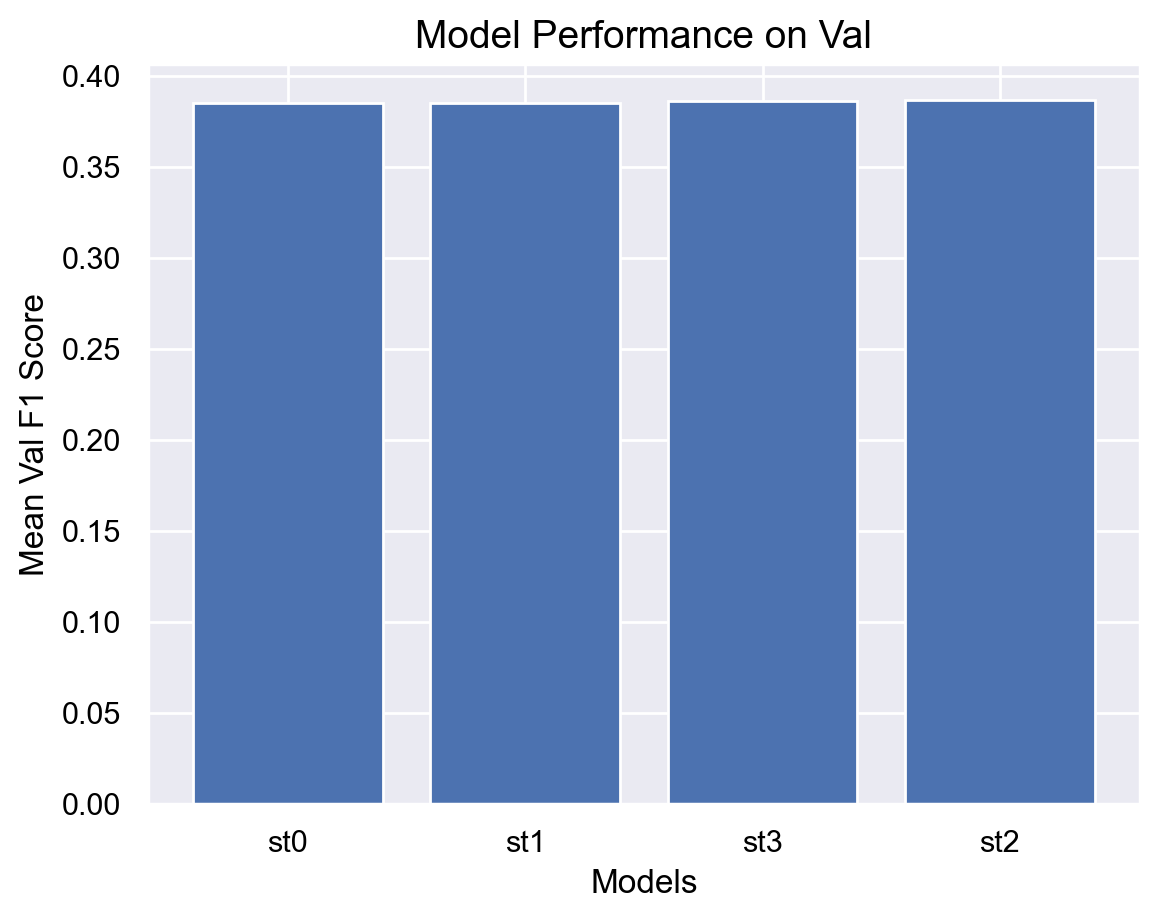

In [136]:
results_plot(results_dict)

In [357]:
df_test = pd.read_csv('df_test_nb2.csv', sep=',', parse_dates=date_cols, index_col='Claim Identifier')

df_sample_submission = pd.read_csv('sample_submission.csv', sep=',')

In [262]:
# first with our best model: XGBoost

In [264]:
# with the best params 
#best_model = XGBClassifier(
    #learning_rate=0.1,
    #max_depth=int(8),  
    #min_split_loss=0.1, 
    #n_estimators=int(50), 
    #subsample=0.7, 
    #random_state=42 
)

#df_test_deployment_xgboost, best_model, cv_returns = final_predictions(df, df_test, best_model, feats_dict)

#df_test_deployment_xgboost

Starting Feature Selection:

Spearman Correlation - Number of Excluded Features: 2 / 19
Spearman Correlation - Excluded Features: {'Average Weekly Wage Category', 'Average Weekly Wage'}
Spearman Correlation - Highly Correlated Pairs: [('Average Weekly Wage Category', 'Average Weekly Wage'), ('Age * Avg Weekly Wage', 'Average Weekly Wage'), ('Age * Avg Weekly Wage', 'Average Weekly Wage Category')]

RFE - Number of Selected Features: 17 / 23
RFE - Selected Features: ['Age at Injury', 'Alternative Dispute Resolution', 'Attorney/Representative', 'Average Weekly Wage', 'County of Injury', 'COVID-19 Indicator', 'District Name', 'C-2 Date Missing', 'C-3 Date Missing', 'First Hearing Date Missing', 'Average Weekly Wage Category', 'Age * Avg Weekly Wage', 'Average Weekly Wage by Medical Fee Region', 'Average Weekly Wage by Gender', 'Part of Body Category', 'Nature of Injury Category', 'Cause of Injury Category']

Decision Tree - Number of Selected Features: 8 / 23
Decision Tree - Selected Feat

,Claim Identifier,Claim Injury Type
0,6165911,2. NON-COMP
1,6166141,2. NON-COMP
2,6165907,2. NON-COMP
3,6166047,2. NON-COMP
4,6166102,2. NON-COMP
...,...,...
387970,6553137,2. NON-COMP
387971,6553119,1. CANCELLED
387972,6553542,1. CANCELLED
387973,6553455,1. CANCELLED


In [332]:
# Prepare the submission DataFrame with the necessary columns (reset the index to treat 'Claim Identifier' as a column)

#df_submission_xgb = df_test_deployment_xgboost[['Claim Identifier', 'Claim Injury Type']].set_index('Claim Identifier')

# Check the submission DataFrame
#print(df_submission_xgb.head())

                 Claim Injury Type
Claim Identifier                  
6165911                2. NON-COMP
6166141                2. NON-COMP
6165907                2. NON-COMP
6166047                2. NON-COMP
6166102                2. NON-COMP


In [334]:
#df_submission_xgb

,Claim Injury Type
Claim Identifier,
6165911,2. NON-COMP
6166141,2. NON-COMP
6165907,2. NON-COMP
6166047,2. NON-COMP
6166102,2. NON-COMP
...,...
6553137,2. NON-COMP
6553119,1. CANCELLED
6553542,1. CANCELLED


In [359]:
best_model = stack_clf = StackingClassifier(
    estimators=estimators2,
    final_estimator=final_estimator,
    cv=5,
    stack_method='predict_proba'
)
df_test_deployment_stacking, best_model, cv_returns = final_predictions(df, df_test, best_model, feats_dict)

df_test_deployment_stacking

Starting Feature Selection:

Spearman Correlation - Number of Excluded Features: 2 / 19
Spearman Correlation - Excluded Features: {'Average Weekly Wage Category', 'Average Weekly Wage'}
Spearman Correlation - Highly Correlated Pairs: [('Average Weekly Wage Category', 'Average Weekly Wage'), ('Age * Avg Weekly Wage', 'Average Weekly Wage'), ('Age * Avg Weekly Wage', 'Average Weekly Wage Category')]

RFE - Number of Selected Features: 17 / 23
RFE - Selected Features: ['Age at Injury', 'Alternative Dispute Resolution', 'Attorney/Representative', 'Average Weekly Wage', 'County of Injury', 'COVID-19 Indicator', 'District Name', 'C-2 Date Missing', 'C-3 Date Missing', 'First Hearing Date Missing', 'Average Weekly Wage Category', 'Age * Avg Weekly Wage', 'Average Weekly Wage by Medical Fee Region', 'Average Weekly Wage by Gender', 'Part of Body Category', 'Nature of Injury Category', 'Cause of Injury Category']

Decision Tree - Number of Selected Features: 9 / 23
Decision Tree - Selected Feat

,Claim Identifier,Claim Injury Type
0,6165911,2. NON-COMP
1,6166141,2. NON-COMP
2,6165907,2. NON-COMP
3,6166047,2. NON-COMP
4,6166102,2. NON-COMP
...,...,...
387970,6553137,2. NON-COMP
387971,6553119,1. CANCELLED
387972,6553542,2. NON-COMP
387973,6553455,1. CANCELLED


In [360]:
# Prepare the submission DataFrame with the necessary columns (reset the index to treat 'Claim Identifier' as a column)

df_submission_st = df_test_deployment_stacking[['Claim Identifier', 'Claim Injury Type']].set_index('Claim Identifier')

# Check the submission DataFrame
df_submission_st

,Claim Injury Type
Claim Identifier,
6165911,2. NON-COMP
6166141,2. NON-COMP
6165907,2. NON-COMP
6166047,2. NON-COMP
6166102,2. NON-COMP
...,...
6553137,2. NON-COMP
6553119,1. CANCELLED
6553542,2. NON-COMP


In [365]:
# Export test data predictions
df_submission_st.to_csv('Group_38_predictions_st.csv') # stacking
#df_submission_xgb.to_csv('Group_38_predictions_xgb.csv') #xgb

**Best Optimized Model:** XGBoost